# Import necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from wordcloud import WordCloud

# Import the training dataset

In [35]:
imdb=pd.read_csv('IMDB Dataset.csv',engine='python',error_bad_lines=False)
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


## IMDB Dataset

In [56]:
imdb.head()

,review,sentiment
0,one review ha mention watch 1 Oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


# Sentiment count

In [36]:
imdb['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

# Text normalization

In [37]:
nltk.download('stopwords')
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Removing html strips 

In [0]:
def html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Apply function on review column
imdb['review']=imdb['review'].apply(html)

# Removing special characters

In [0]:
#Define function for removing special characters
def specialcharacters(text, remove_digits=True):
    pattern='[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(specialcharacters)

# Text stemming

In [0]:
#Stemming the text
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(stemmer)

# Removing stopwords

In [41]:
stop=set(stopwords.words('english'))
print(stop)
#Tokenization of text
tokenizer=ToktokTokenizer()
#removing the stopwords
def stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb['review']=imdb['review'].apply(stopwords)

{'through', 'can', "mightn't", 'needn', 'weren', 'y', 'were', 'more', 'nor', 'are', 'shouldn', 'is', 'me', 'how', 'himself', 'which', 'such', 'about', 'most', 'too', "hasn't", 'this', 'by', 'up', 'did', 'as', 'm', 'had', "you'll", 'an', 'them', 'there', 'yourself', 'herself', 'now', 'further', 'i', 'theirs', 'am', 'and', 'off', 'where', 'same', 'other', 'what', 'for', 'the', 'against', 'his', 'won', 'during', 't', "wouldn't", 'was', 'once', 'will', 'hers', "haven't", 'under', 're', "doesn't", 'when', 'here', 'from', 'or', 'these', 'doesn', "didn't", "shan't", 'between', "mustn't", "don't", 'their', 'if', 'has', 'hasn', 'ma', 'yourselves', "shouldn't", 'you', 'being', 'than', "you're", 'into', 'not', 'aren', 'who', 'mustn', 'on', 'yours', 'isn', 'while', 'be', "she's", 'they', 'some', 'very', "wasn't", 'haven', 'with', "hadn't", 'we', 'itself', "aren't", 'so', 'down', "you've", 'does', 'until', "couldn't", 'it', 'then', 'your', "it's", 'd', 'its', 'have', 'again', 'do', 'few', 'my', 'ov

# Splitting the review

In [0]:
training_reviews_1=imdb.review[:43000]
testing_reviews_1=imdb.review[43000:]

# Bags of words

In [0]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_training_reviews=cv.fit_transform(training_reviews_1)
#transformed test reviews
cv_testing_reviews=cv.transform(testing_reviews_1)

# Encoding the sentiment data

In [44]:
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb['sentiment'])
print(sentiment_data.shape)

(50000, 1)


# Spliting the sentiment data

In [0]:
train_sentiments=sentiment_data[:43000]
test_sentiments=sentiment_data[43000:]

# Creating Logistic Regression model

In [46]:
lr=LogisticRegression(penalty='none',max_iter=600,random_state=42)
#Fitting the model for Bag of words
lr_fit=lr.fit(cv_training_reviews,train_sentiments)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Predicting the model

In [47]:
print(lr.predict(cv_testing_reviews[0]))
print(test_sentiments[0])

[0]
[0]


# Accuracy of the model

In [48]:
lr.score(cv_testing_reviews,test_sentiments)

0.714

# Classification report


In [49]:
report=classification_report(test_sentiments,lr.predict(cv_testing_reviews),target_names=['Positive','Negative'])
print(report)

              precision    recall  f1-score   support

    Positive       0.67      0.85      0.75      3512
    Negative       0.79      0.58      0.67      3488

    accuracy                           0.71      7000
   macro avg       0.73      0.71      0.71      7000
weighted avg       0.73      0.71      0.71      7000



## Confusion matrix 


In [50]:
confusion_matrix(test_sentiments,lr.predict(cv_testing_reviews),labels=[1,0])

array([[2015, 1473],
       [ 529, 2983]])

## Word cloud for positive review words

<function matplotlib.pyplot.show>

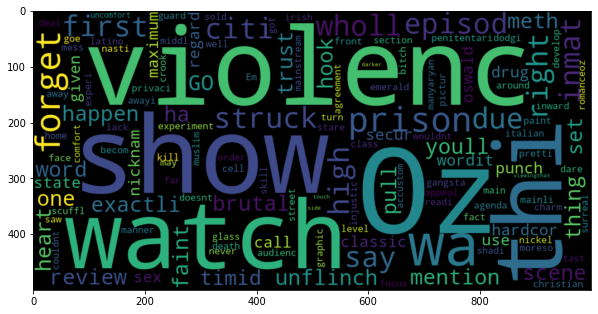

In [52]:
plt.figure(figsize=(10,10))
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(imdb['review'][0])
plt.imshow(positive_words,interpolation='bilinear')
plt.show

## Word cloud for negative review words

<function matplotlib.pyplot.show>

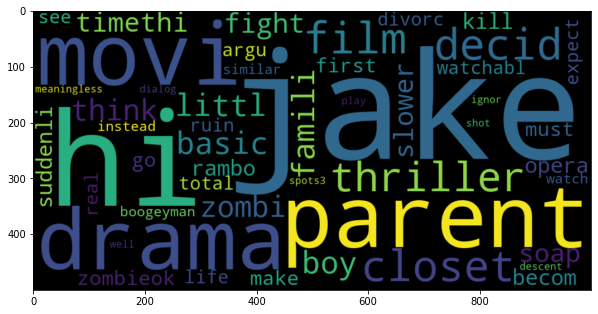

In [55]:
plt.figure(figsize=(10,10))
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(imdb['review'][3])
plt.imshow(negative_words,interpolation='bilinear')
plt.show